## Plotting bars of the trap weights for paper

Importing the data:

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d
import matplotlib.lines as mlines
import matplotlib.colors as mcolors

# load data
spring = pd.read_csv('spring2023_GSD.csv')
summer = pd.read_csv('summer2023_GSD.csv')

Formatting the data set for sns to use

In [3]:
# melt the DataFrame to long format
spring_melted = spring.melt(id_vars='Size', var_name='Sample', value_name='Percentage')
summer_melted = summer.melt(id_vars='Size', var_name='Sample', value_name='Percentage')
# create a new DataFrame for total weights
spring_weights = spring[spring['Size'].isin(['WEIGHTLISST'])].melt(id_vars='Size', var_name='Sample', value_name='Weight')
summer_weights = summer[summer['Size'].isin(['WEIGHTLISST'])].melt(id_vars='Size', var_name='Sample', value_name='Weight')
# create data frames for different GS weights
# coarse sand
spring_CS = spring[spring['Size'].isin(['COARSESAND'])].melt(id_vars='Size', var_name='Sample', value_name='Weight')
summer_CS = summer[summer['Size'].isin(['COARSESAND'])].melt(id_vars='Size', var_name='Sample', value_name='Weight')
# fine sand 
spring_FS = spring[spring['Size'].isin(['FINESAND'])].melt(id_vars='Size', var_name='Sample', value_name='Weight')
summer_FS = summer[summer['Size'].isin(['FINESAND'])].melt(id_vars='Size', var_name='Sample', value_name='Weight')
# silt
spring_S = spring[spring['Size'].isin(['SILT'])].melt(id_vars='Size', var_name='Sample', value_name='Weight')
summer_S = summer[summer['Size'].isin(['SILT'])].melt(id_vars='Size', var_name='Sample', value_name='Weight')
# clay
spring_C = spring[spring['Size'].isin(['CLAY'])].melt(id_vars='Size', var_name='Sample', value_name='Weight')
summer_C = summer[summer['Size'].isin(['CLAY'])].melt(id_vars='Size', var_name='Sample', value_name='Weight')

In [4]:
# function to determine if the sample is open or closed
def determine_type(sample_id):
    if sample_id.endswith(('B', 'C')):
        return 'open'
    elif sample_id.endswith(('A', 'D')):
        return 'closed'
    else:
        return 'unknown'  

# apply the function to create a new column
spring_CS['Type'] = spring_CS['Sample'].apply(determine_type)
summer_CS['Type'] = summer_CS['Sample'].apply(determine_type)
spring_FS['Type'] = spring_FS['Sample'].apply(determine_type)
summer_FS['Type'] = summer_FS['Sample'].apply(determine_type)
spring_S['Type'] = spring_S['Sample'].apply(determine_type)
summer_S['Type'] = summer_S['Sample'].apply(determine_type)
spring_C['Type'] = spring_C['Sample'].apply(determine_type)
summer_C['Type'] = summer_C['Sample'].apply(determine_type)

## Bar Plots

Total Sediment

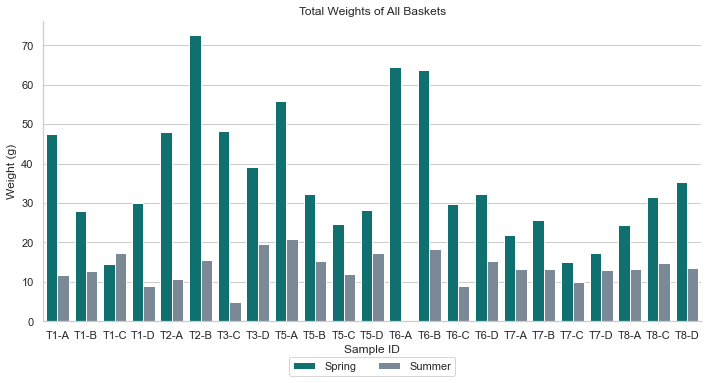

In [6]:
# add a new column to indicate the season
spring_weights['season'] = 'Spring'
summer_weights['season'] = 'Summer'

# concatenate the two dataframes
weights = pd.concat([spring_weights, summer_weights])
weights['Type'] = weights['Sample'].apply(determine_type)

# create the bar plot with custom colors and alpha value for teal
sns.set_theme(style="whitegrid")
g = sns.catplot(data=weights, x='Sample', y='Weight', hue='season', kind='bar',
                height=5, aspect=2, palette={'Spring': 'teal', 'Summer': 'lightslategray'}, legend=False)

# move the legend to the bottom
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

plt.title('Total Weights of All Baskets')
plt.xlabel('Sample ID')
plt.ylabel('Weight (g)')
plt.savefig('plots/all_basket_weights_barplots.jpeg', dpi=500, bbox_inches='tight')
plt.show()

Coarse Sand

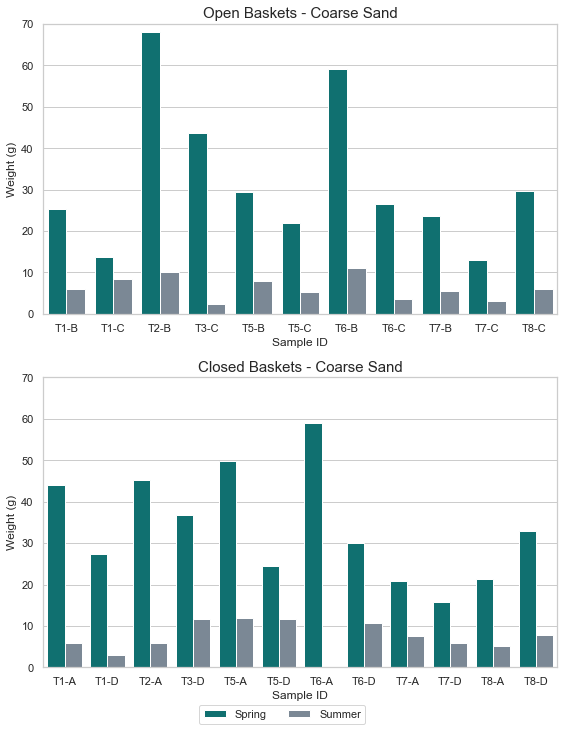

In [7]:
# add a new column to indicate the season
spring_CS['season'] = 'Spring'
summer_CS['season'] = 'Summer'

# concatenate the two dataframes
weights = pd.concat([spring_CS, summer_CS])

# separate the dataframes based on the type of trap
open_CS = weights[weights['Type'] == 'open']
closed_CS = weights[weights['Type'] == 'closed']

# create open and closed bar plots using subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 10))
sns.set_theme(style="whitegrid")

# open baskets
sns.barplot(data=open_CS, x='Sample', y='Weight', hue='season', 
            ax=axs[0], palette={'Spring': 'teal', 'Summer': 'lightslategray'})
axs[0].set_title('Open Baskets - Coarse Sand', size=15)
axs[0].set_ylabel('Weight (g)')
axs[0].set_xlabel('Sample ID')
axs[0].set_ylim(0, 70)
axs[0].legend_.remove()  # remove the individual legend for open baskets

# closed baskets
sns.barplot(data=closed_CS, x='Sample', y='Weight', hue='season', 
            ax=axs[1], palette={'Spring': 'teal', 'Summer': 'lightslategray'})
axs[1].set_title('Closed Baskets - Coarse Sand', size=15)
axs[1].set_ylabel('Weight (g)')
axs[1].set_xlabel('Sample ID')
axs[1].set_ylim(0, 70)
axs[1].legend_.remove()  # remove the individual legend for closed baskets

# add a single legend for both plots
handles, labels = axs[0].get_legend_handles_labels()  # get legend info from the first plot
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.02), ncol=2)

# adjust layout and save the figure
plt.tight_layout()  # Leave space for the legend at the bottom
plt.savefig('plots/CS_basket_weights_barplots.jpg', dpi=500, bbox_inches='tight')
plt.show()

Fine Sand

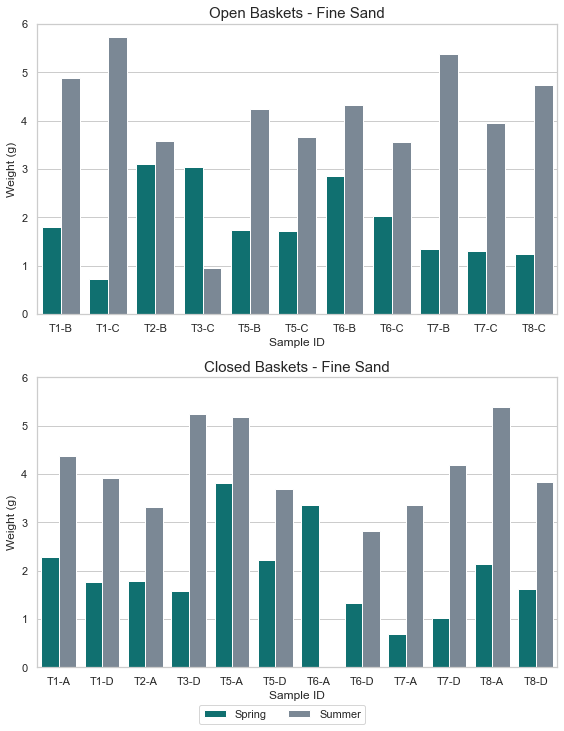

In [8]:
# add a new column to indicate the season
spring_FS['season'] = 'Spring'
summer_FS['season'] = 'Summer'

# concatenate the two dataframes
weights = pd.concat([spring_FS, summer_FS])

# separate the dataframes based on the type of trap
open_FS = weights[weights['Type'] == 'open']
closed_FS = weights[weights['Type'] == 'closed']

# create open and closed bar plots using subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 10))
sns.set_theme(style="whitegrid")

# open baskets
sns.barplot(data=open_FS, x='Sample', y='Weight', hue='season', 
            ax=axs[0], palette={'Spring': 'teal', 'Summer': 'lightslategray'})
axs[0].set_title('Open Baskets - Fine Sand', size=15)
axs[0].set_ylabel('Weight (g)')
axs[0].set_xlabel('Sample ID')
axs[0].set_ylim(0, 6)
axs[0].legend_.remove()  # remove the individual legend for open baskets

# closed baskets
sns.barplot(data=closed_FS, x='Sample', y='Weight', hue='season', 
            ax=axs[1], palette={'Spring': 'teal', 'Summer': 'lightslategray'})
axs[1].set_title('Closed Baskets - Fine Sand', size=15)
axs[1].set_ylabel('Weight (g)')
axs[1].set_xlabel('Sample ID')
axs[1].set_ylim(0, 6)
axs[1].legend_.remove()  # remove the individual legend for closed baskets

# add a single legend for both plots
handles, labels = axs[0].get_legend_handles_labels()  # get legend info from the first plot
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.02), ncol=2)

# adjust layout and save the figure
plt.tight_layout()  # Leave space for the legend at the bottom
plt.savefig('plots/FS_basket_weights_barplots.jpg', dpi=500, bbox_inches='tight')
plt.show()

Silt

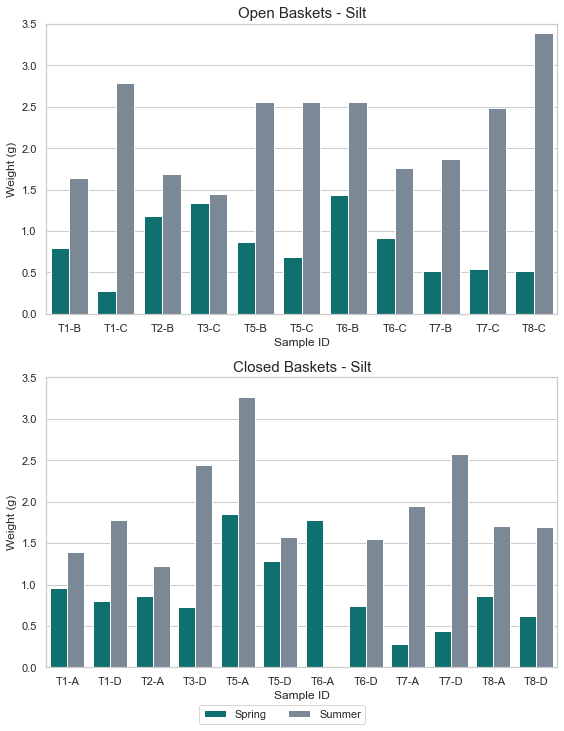

In [9]:
# add a new column to indicate the season
spring_S['season'] = 'Spring'
summer_S['season'] = 'Summer'

# concatenate the two dataframes
weights = pd.concat([spring_S, summer_S])

# separate the dataframes based on the type of trap
open_S = weights[weights['Type'] == 'open']
closed_S = weights[weights['Type'] == 'closed']

# create open and closed bar plots using subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 10))
sns.set_theme(style="whitegrid")

# open baskets
sns.barplot(data=open_S, x='Sample', y='Weight', hue='season', 
            ax=axs[0], palette={'Spring': 'teal', 'Summer': 'lightslategray'})
axs[0].set_title('Open Baskets - Silt', size=15)
axs[0].set_ylabel('Weight (g)')
axs[0].set_xlabel('Sample ID')
axs[0].set_ylim(0, 3.5)
axs[0].legend_.remove()  # remove the individual legend for open baskets

# closed baskets
sns.barplot(data=closed_S, x='Sample', y='Weight', hue='season', 
            ax=axs[1], palette={'Spring': 'teal', 'Summer': 'lightslategray'})
axs[1].set_title('Closed Baskets - Silt', size=15)
axs[1].set_ylabel('Weight (g)')
axs[1].set_xlabel('Sample ID')
axs[1].set_ylim(0, 3.5)
axs[1].legend_.remove()  # remove the individual legend for closed baskets

# add a single legend for both plots
handles, labels = axs[0].get_legend_handles_labels()  # get legend info from the first plot
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.02), ncol=2)

# adjust layout and save the figure
plt.tight_layout()  # Leave space for the legend at the bottom
plt.savefig('plots/S_basket_weights_barplots.jpg', dpi=500, bbox_inches='tight')
plt.show()

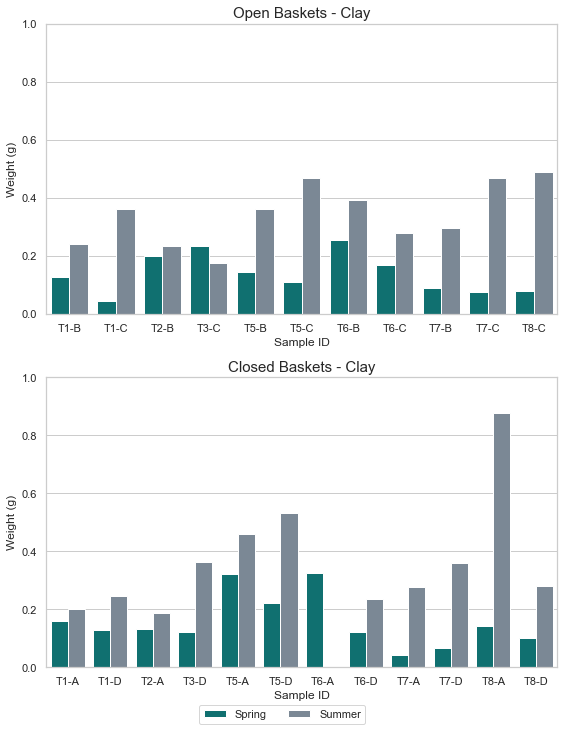

In [10]:
# add a new column to indicate the season
spring_C['season'] = 'Spring'
summer_C['season'] = 'Summer'

# concatenate the two dataframes
weights = pd.concat([spring_C, summer_C])

# separate the dataframes based on the type of trap
open_C = weights[weights['Type'] == 'open']
closed_C = weights[weights['Type'] == 'closed']

# create open and closed bar plots using subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 10))
sns.set_theme(style="whitegrid")

# open baskets
sns.barplot(data=open_C, x='Sample', y='Weight', hue='season', 
            ax=axs[0], palette={'Spring': 'teal', 'Summer': 'lightslategray'})
axs[0].set_title('Open Baskets - Clay', size=15)
axs[0].set_ylabel('Weight (g)')
axs[0].set_xlabel('Sample ID')
axs[0].set_ylim(0, 1)
axs[0].legend_.remove()  # remove the individual legend for open baskets

# closed baskets
sns.barplot(data=closed_C, x='Sample', y='Weight', hue='season', 
            ax=axs[1], palette={'Spring': 'teal', 'Summer': 'lightslategray'})
axs[1].set_title('Closed Baskets - Clay', size=15)
axs[1].set_ylabel('Weight (g)')
axs[1].set_xlabel('Sample ID')
axs[1].set_ylim(0, 1)
axs[1].legend_.remove()  # remove the individual legend for closed baskets

# add a single legend for both plots
handles, labels = axs[0].get_legend_handles_labels()  # get legend info from the first plot
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.02), ncol=2)

# adjust layout and save the figure
plt.tight_layout()  # Leave space for the legend at the bottom
plt.savefig('plots/C_basket_weights_barplots.jpg', dpi=500, bbox_inches='tight')
plt.show()

Massive Composite Plot

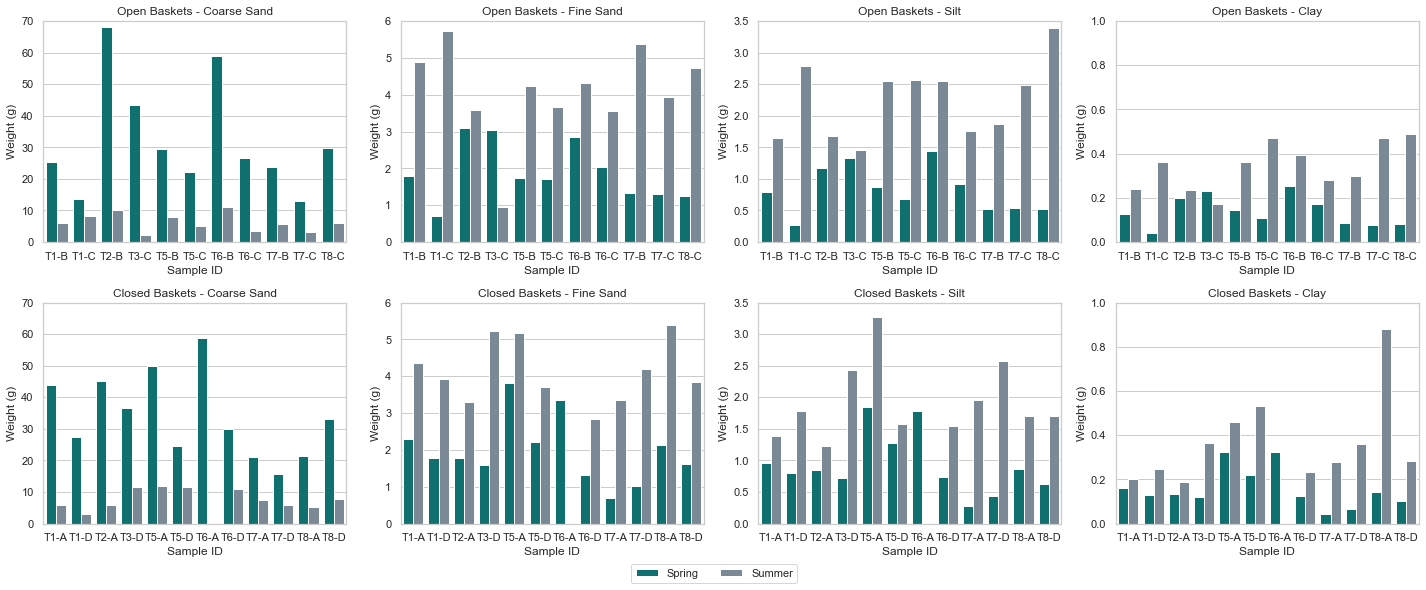

In [11]:
# create open and closed bar plots using subplots
fig, axs = plt.subplots(2, 4, figsize=(20, 8))
sns.set_theme(style="whitegrid")

# coarse sand
sns.barplot(data=open_CS, x='Sample', y='Weight', hue='season', 
            ax=axs[0, 0], palette={'Spring': 'teal', 'Summer': 'lightslategray'})
axs[0, 0].set_title('Open Baskets - Coarse Sand')
axs[0, 0].set_ylim(0, 70)
axs[0, 0].set_ylabel('Weight (g)')
axs[0, 0].set_xlabel('Sample ID')
axs[0, 0].legend_.remove()
sns.barplot(data=closed_CS, x='Sample', y='Weight', hue='season', 
            ax=axs[1, 0], palette={'Spring': 'teal', 'Summer': 'lightslategray'})
axs[1, 0].set_title('Closed Baskets - Coarse Sand')
axs[1, 0].set_ylim(0, 70)
axs[1, 0].set_ylabel('Weight (g)')
axs[1, 0].set_xlabel('Sample ID')
axs[1, 0].legend_.remove() 

# fine sand
sns.barplot(data=open_FS, x='Sample', y='Weight', hue='season',
            ax=axs[0, 1], palette={'Spring': 'teal', 'Summer': 'lightslategray'})
axs[0, 1].set_title('Open Baskets - Fine Sand')
axs[0, 1].set_ylim(0, 6)
axs[0, 1].set_ylabel('Weight (g)')
axs[0, 1].set_xlabel('Sample ID')
axs[0, 1].legend_.remove()
sns.barplot(data=closed_FS, x='Sample', y='Weight', hue='season',
            ax=axs[1, 1], palette={'Spring': 'teal', 'Summer': 'lightslategray'})
axs[1, 1].set_title('Closed Baskets - Fine Sand')
axs[1, 1].set_ylim(0, 6)
axs[1, 1].set_ylabel('Weight (g)')
axs[1, 1].set_xlabel('Sample ID')
axs[1, 1].legend_.remove()

# silt
sns.barplot(data=open_S, x='Sample', y='Weight', hue='season',
            ax=axs[0, 2], palette={'Spring': 'teal', 'Summer': 'lightslategray'})
axs[0, 2].set_title('Open Baskets - Silt')
axs[0, 2].set_ylim(0, 3.5)
axs[0, 2].set_ylabel('Weight (g)')
axs[0, 2].set_xlabel('Sample ID')
axs[0, 2].legend_.remove()
sns.barplot(data=closed_S, x='Sample', y='Weight', hue='season',
            ax=axs[1, 2], palette={'Spring': 'teal', 'Summer': 'lightslategray'})
axs[1, 2].set_title('Closed Baskets - Silt')
axs[1, 2].set_ylim(0, 3.5)
axs[1, 2].set_ylabel('Weight (g)')
axs[1, 2].set_xlabel('Sample ID')
axs[1, 2].legend_.remove()

# clay
sns.barplot(data=open_C, x='Sample', y='Weight', hue='season',
            ax=axs[0, 3], palette={'Spring': 'teal', 'Summer': 'lightslategray'})
axs[0, 3].set_title('Open Baskets - Clay')
axs[0, 3].set_ylim(0, 1)
axs[0, 3].set_ylabel('Weight (g)')
axs[0, 3].set_xlabel('Sample ID')
axs[0, 3].legend_.remove()
sns.barplot(data=closed_C, x='Sample', y='Weight', hue='season',
            ax=axs[1, 3], palette={'Spring': 'teal', 'Summer': 'lightslategray'})
axs[1, 3].set_title('Closed Baskets - Clay')
axs[1, 3].set_ylim(0, 1)
axs[1, 3].set_ylabel('Weight (g)')
axs[1, 3].set_xlabel('Sample ID')
axs[1, 3].legend_.remove()

# add a single legend for both plots
handles, labels = axs[0,0].get_legend_handles_labels()  # get legend info from the first plot
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.02), ncol=2)

# adjust layout and save the figure
plt.tight_layout()  # Leave space for the legend at the bottom
plt.savefig('plots/all_basket_weights_barplots.jpg', dpi=1000, bbox_inches='tight')
plt.show()

## Main Bar Plot

Need to combine in order to represent three baskets (both open and closed)

In [18]:
coarse_sand = pd.concat([spring_CS, summer_CS])
fine_sand = pd.concat([spring_FS, summer_FS])
silt = pd.concat([spring_S, summer_S])
clay = pd.concat([spring_C, summer_C])
total_weights = pd.concat([spring_weights, summer_weights])

# for summarized bar plots, only select baskets that start with T2 A,B, T5 A,B and T6 C,D
summary_cs = coarse_sand[coarse_sand['Sample'].str.startswith(('T2-A', 'T2-B', 'T8-C', 'T8-D', 'T5-A', 'T5-B'))]
summary_fs = fine_sand[fine_sand['Sample'].str.startswith(('T2-A', 'T2-B', 'T8-C', 'T8-D', 'T5-A', 'T5-B'))]
summary_s = silt[silt['Sample'].str.startswith(('T2-A', 'T2-B', 'T8-C', 'T8-D', 'T5-A', 'T5-B'))]
summary_c = clay[clay['Sample'].str.startswith(('T2-A', 'T2-B', 'T8-C', 'T8-D', 'T5-A', 'T5-B'))]
summary_weights = total_weights[total_weights['Sample'].str.startswith(('T2-A', 'T2-B', 'T8-C', 'T8-D', 'T5-A', 'T5-B'))]

Primary (Total Weights)

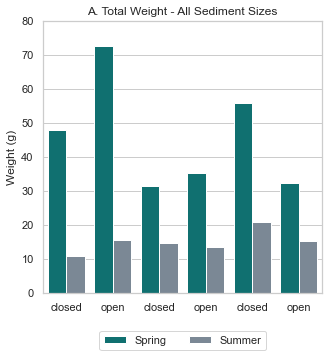

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
labels = ['closed\n', 'open\n', 'closed\n', 'open\n', 'closed\n', 'open\n']

# define the desired order of the samples
sample_order = ['T2-A', 'T2-B', 'T8-C', 'T8-D', 'T5-A', 'T5-B']

ax = sns.barplot(data=summary_weights, x='Sample', y='Weight', hue='season', dodge=True, errorbar=None, 
                palette={'Spring': 'teal', 'Summer': 'lightslategray'}, order=sample_order)

plt.title('A. Total Weight - All Sediment Sizes')
plt.ylim(0, 80)
plt.ylabel('Weight (g)')
plt.xlabel('')
ax.set_xticklabels(labels)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2)
plt.savefig('plots/total_basket_weights_barplots_DNU.jpg', dpi=1000, bbox_inches='tight')
plt.show()

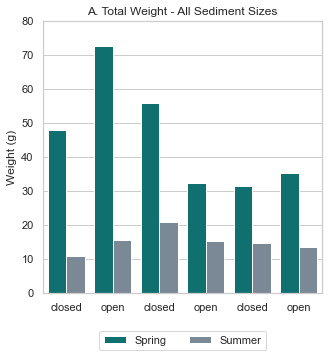

In [38]:
plt.figure(figsize=(5, 5))
labels = ['closed\n', 'open\n', 'closed\n', 'open\n', 'closed\n', 'open\n']

ax = sns.barplot(data=summary_weights, x='Sample', y='Weight', hue='season', dodge=True, errorbar=None, 
            palette={'Spring': 'teal', 'Summer': 'lightslategray'})

plt.title('A. Total Weight - All Sediment Sizes')
plt.ylim(0, 80)
plt.ylabel('Weight (g)')
plt.xlabel('')
ax.set_xticklabels(labels)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2)
plt.savefig('plots/total_basket_weights_barplots.jpg', dpi=1000, bbox_inches='tight')
plt.show()

Secondary (Weights by Grain Size)

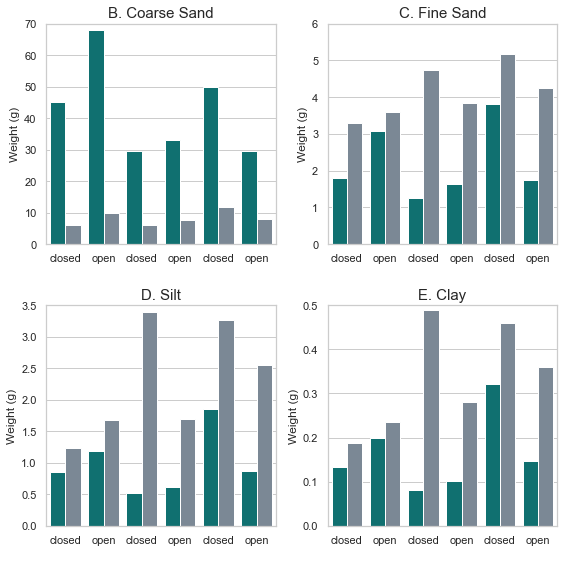

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
sns.set_theme(style="whitegrid")
labels = ['closed\n', 'open\n', 'closed\n', 'open\n', 'closed\n', 'open\n']

# define the desired order of the samples
sample_order = ['T2-A', 'T2-B', 'T8-C', 'T8-D', 'T5-A', 'T5-B']

# coarse sand
sns.barplot(data=summary_cs, x='Sample', y='Weight', hue='season', ax=axs[0,0],
            dodge=True, errorbar=None, palette={'Spring': 'teal', 'Summer': 'lightslategray'}, order=sample_order)
axs[0,0].set_title('B. Coarse Sand', size=15)
axs[0,0].set_ylim(0, 70)
axs[0,0].set_ylabel('Weight (g)')  
axs[0,0].set_xlabel('') 
axs[0,0].set_xticks(ticks=axs[0,0].get_xticks()) 
axs[0,0].set_xticklabels(labels)  
axs[0,0].legend_.remove()
tick_positions = axs[0,0].get_xticks()

# fine sand
sns.barplot(data=summary_fs, x='Sample', y='Weight', hue='season', ax=axs[0,1],
            dodge=True, errorbar=None, palette={'Spring': 'teal', 'Summer': 'lightslategray'}, order=sample_order)
axs[0,1].set_title('C. Fine Sand', size=15)
axs[0,1].set_ylim(0, 6)
axs[0,1].set_ylabel('Weight (g)')
axs[0,1].set_xlabel('')
axs[0,1].set_xticks(ticks=axs[0,1].get_xticks())
axs[0,1].set_xticklabels(labels)
axs[0,1].legend_.remove()
tick_positions = axs[0,1].get_xticks()

# silt
sns.barplot(data=summary_s, x='Sample', y='Weight', hue='season', ax=axs[1,0],
            dodge=True, errorbar=None, palette={'Spring': 'teal', 'Summer': 'lightslategray'}, order=sample_order)
axs[1,0].set_title('D. Silt', size=15)
axs[1,0].set_ylim(0, 3.5)
axs[1,0].set_ylabel('Weight (g)')
axs[1,0].set_xlabel('')
axs[1,0].set_xticks(ticks=axs[1,0].get_xticks())
axs[1,0].set_xticklabels(labels)
axs[1,0].legend_.remove()
tick_positions = axs[1,0].get_xticks()

# clay
sns.barplot(data=summary_c, x='Sample', y='Weight', hue='season', ax=axs[1,1],
            dodge=True, errorbar=None, palette={'Spring': 'teal', 'Summer': 'lightslategray'}, order=sample_order)

axs[1,1].set_title('E. Clay', size=15)
axs[1,1].set_ylim(0, 0.5)
axs[1,1].set_ylabel('Weight (g)')
axs[1,1].set_xlabel('')
axs[1,1].set_xticks(ticks=axs[1,1].get_xticks())
axs[1,1].set_xticklabels(labels)
axs[1,1].legend_.remove()
tick_positions = axs[1,1].get_xticks()

# Set alpha for lightslategray bars in all subplots
for ax in axs.flat:
    for patch in ax.patches:
        # Convert patch color to RGB for comparison, ignoring alpha
        patch_color = mcolors.to_rgb(patch.get_facecolor())
        lightslategray_rgb = mcolors.to_rgb('lightslategray')
        
        if patch_color == lightslategray_rgb:
            # Set the color with a new alpha
            patch.set_facecolor((119/255, 136/255, 153/255, 0.01))  # lightslategray with alpha 0.1

plt.tight_layout()
plt.savefig('plots/sizes_basket_weights_barplots_DNU.jpg', dpi=1000, bbox_inches='tight')
plt.show()